In [1]:
import numpy as np
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import os
from pydub import AudioSegment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Flatten, Dense
import pyaudio
import wave

2022-10-19 12:56:31.649107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 12:56:32.418455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 12:56:32.418485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-19 12:56:32.513460: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-19 12:56:34.141369: W tensorflow/stream_executor/platform/de

In [2]:
def feature_extraction(path):
    (rate, signal) = wav.read(path)
    mfcc0 = mfcc(signal, rate, nfft=1200)

    return mfcc0

In [3]:
def all_features_extraction(dir1, dir2):
    contJ=0
    contO=0
    n = len(os.listdir(dir1))+len(os.listdir(dir2))

    matriz = np.zeros((n,199,13), float)
    labels = np.empty(n)
    cont1 = os.listdir(dir1)
    cont2 = os.listdir(dir2)
    for i in range(len(cont1)):
        feature = feature_extraction(os.path.join(dir1, cont1[i]))
        if(len(feature) == 399):
            matriz[i]=feature[:199]
        else:
            matriz[i]=feature
        labels[i] = 1
        contJ +=1
    for j in range(len(cont2)):
        feature = feature_extraction(os.path.join(dir2, cont2[j]))
        matriz[contJ+j]=feature
        labels[contJ+j] = 0
        contO+=1
    return contJ, contO, matriz, labels

In [4]:
dirJhon='JhonWav2seg'
dirOther = 'OtherWav2'
contJ, contO, matrizC, labels= all_features_extraction(dirJhon, dirOther)#Se extraen las caracteristicas en la matriz

In [5]:
labels=np.reshape(labels, (-1,1))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(matrizC, labels, test_size=0.2, random_state=23)

In [8]:
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [9]:
#Estandarizar matriz de caracteristicas

scTrain=StandardScaler()
scTrain.fit(X_train)
X_train_st=scTrain.transform(X_train)

In [10]:
scTest=StandardScaler()
scTest.fit(X_test)
X_test_std=scTest.transform(X_test)

In [11]:
from keras.utils import np_utils

nclasses = 2
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [12]:
input_dim = X_train_st.shape[1]
output_dim = Y_train.shape[1]

In [13]:
modelo=Sequential()
modelo.add(Dense(50, input_dim=input_dim, activation='relu'))
modelo.add(Flatten())
modelo.add(Dense(output_dim, activation='softmax'))

2022-10-19 12:57:27.856500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 12:57:27.857150: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 12:57:27.857173: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jhonf-Nitro-AN515-55): /proc/driver/nvidia/version does not exist
2022-10-19 12:57:27.858646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=modelo.fit(X_train, Y_train,validation_split=0.3, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 9.4532 - accuracy: 0.7708 - val_loss: 1.0006 - val_accuracy: 0.9524
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6632 - accuracy: 0.9514 - val_loss: 2.0572 - val_accuracy: 0.9524
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5733 - accuracy: 0.9861 - val_loss: 1.4940 - val_accuracy: 0.9524
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 5.4305e-07 - accuracy: 1.0000 - val_loss: 1.0473 - val_accuracy: 0.9524
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0117 - accuracy: 0.9931 - val_loss: 1.1450 - val_accuracy: 0.9524
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 5.0166e-05 - accuracy: 1.0000 - val_loss: 1.2141 - val_accuracy: 0.9524
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 2.7563e-04 - accuracy: 1.0000 - val_loss: 1.2509 - val_accuracy: 0.9524
Epoch 8/10
5/5 [===

In [16]:
def visualizacion_resultados(history):
  epochs = [i for i in range(10)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

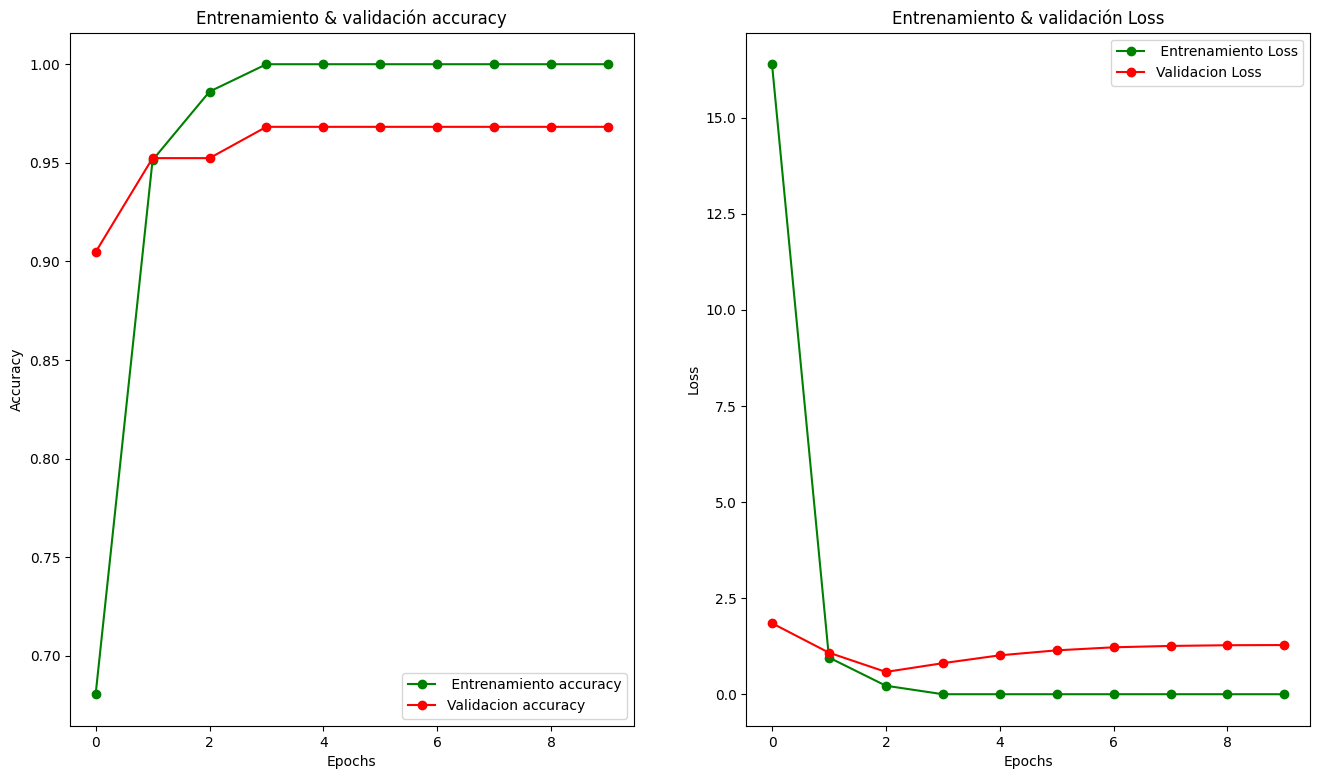

In [75]:
visualizacion_resultados(history)

In [76]:
p=modelo.evaluate(X_test,Y_test)
p

2/2 [==============================] - 0s 3ms/step - loss: 1.5910 - accuracy: 0.9423


[1.5909888744354248, 0.942307710647583]

In [19]:
def prueba(path):
    mfff=feature_extraction(path)
    if(len(mfff) == 399):
        mfff=mfff[:199]
        mfff_ = np.reshape(mfff, (mfff.shape[0]*mfff.shape[1]))
        mff_ = np.reshape(mfff_, (1,-1))
    else:
        mfff_ = np.reshape(mfff, (mfff.shape[0]*mfff.shape[1]))
        mff_ = np.reshape(mfff_, (1,-1))
    return mff_

In [17]:
def grabacion(pathDest):
    Format=pyaudio.paInt16
    Channels=1
    Rate=44100
    Chunk=1024
    Duracion=5

    audio=pyaudio.PyAudio()

    stream=audio.open(format=Format, channels=Channels,
                        rate=Rate, input=True,
                        frames_per_buffer=Chunk)

    print('grabando....')
    frames=[]

    for i in range(0,int(Rate/Chunk*Duracion)):
        data=stream.read(Chunk)
        frames.append(data)
    print('grabacion terminada')


    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile=wave.open(pathDest, 'wb')
    waveFile.setnchannels(Channels)
    waveFile.setsampwidth(audio.get_sample_size(Format))
    waveFile.setframerate(Rate)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    print('Guardado')

    print('Recortando')
    audSeg = AudioSegment.from_wav(pathDest)
    audSeg = audSeg[2000:4000]
    dst='grabaciones/grabacion2seg.wav'
    audSeg.export(dst, format="wav")
    print('Recortado')
    
    features = feature_extraction(dst)
    mfff_ = np.reshape(features, (features.shape[0]*features.shape[1]))
    mff_ = np.reshape(mfff_, (1,-1))
    print('Caracteristicas extraidas')

    #os.remove(dst)
    #os.remove(pathDest)

    return mff_

In [20]:
#features = prueba('extraother2seg/sample-000336')
features = prueba('voz150.wav')

In [21]:
features = grabacion('grabaciones/grabacion.wav')

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'


grabando....
grabacion terminada
Guardado
Recortando
Recortado
Caracteristicas extraidas


In [22]:
Y_pred=modelo.predict(features)
Y_pred

1/1 [==============================] - 0s 66ms/step


array([[1., 0.]], dtype=float32)

In [357]:
for i in range(2):
    if(Y_pred[0,i] < 0.5):
        Y_pred[0,i]=0
    else:
        Y_pred[0,i]=1

if(Y_pred[0,0]==1):
    print("Another one")
else:
    print("Jhon")

Jhon


In [362]:
model_json = modelo.to_json()
with open("model/model2silencios.json", "w") as json_file:
  json_file.write(model_json)
#serializan los pesos (weights) para HDF5
modelo.save_weights("model/model2silencios.h5")

In [25]:
from tensorflow.keras.models import model_from_json 

# carga el json y crea el modelo
json_file = open('model/model2silencios.json', 'r')
loaded_model_json = json_file.read()
 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
loaded_model.load_weights("model/model2silencios.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test
loaded_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
score = loaded_model.evaluate(X_test_std, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Modelo cargado desde el PC
accuracy: 90.38%


In [58]:
features = prueba('extraother2seg/sample-000198')
#features = prueba('voz146.wav')

In [63]:
features = grabacion('grabaciones/grabacion.wav')

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'


grabando....
grabacion terminada
Guardado
Recortando
Recortado
Caracteristicas extraidas


In [64]:
ans = loaded_model.predict(features)
ans

1/1 [==============================] - 0s 23ms/step


array([[9.9959570e-01, 4.0436586e-04]], dtype=float32)